# Previsão de nível de radiação solar

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [15]:
df = pd.read_csv('/content/SolarPrediction.csv')
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [16]:
mediana_radiacao = df['Radiation'].median()
df['alta_radiacao'] = (df['Radiation'] > mediana_radiacao).astype(int)
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,alta_radiacao
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,0
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,0
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,0
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,0
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,0


In [17]:
X = df.drop(columns=["alta_radiacao", "Data", "Time", "TimeSunRise", "TimeSunSet"])
Y = df["alta_radiacao"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
model1 = SVC(kernel='linear', random_state=42)
model1.fit(X_train_scaled, y_train)
y_pred = model1.predict(X_test_scaled)

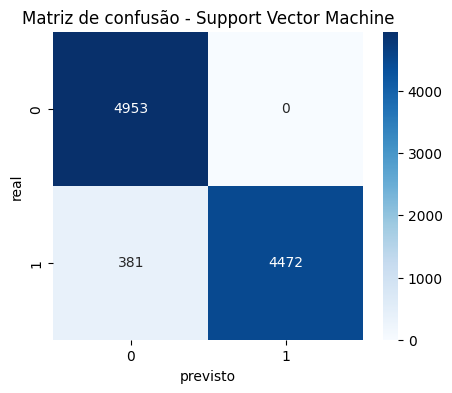

In [21]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("previsto")
plt.ylabel("real")
plt.title("Matriz de confusão - Support Vector Machine")
plt.show()

In [22]:
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train_scaled, y_train)
y_pred = model2.predict(X_test_scaled)

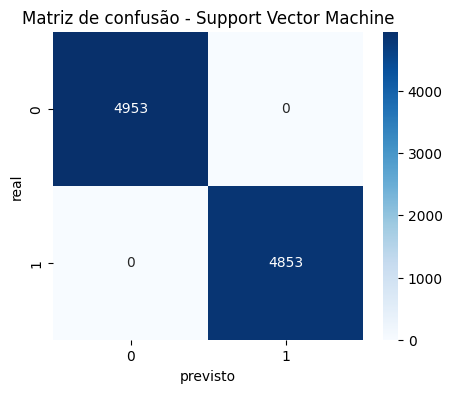

In [23]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("previsto")
plt.ylabel("real")
plt.title("Matriz de confusão - Support Vector Machine")
plt.show()

In [24]:
model3 = RandomForestRegressor(random_state=42)
model3.fit(X_train_scaled, y_train)
y_pred = model3.predict(X_test_scaled)

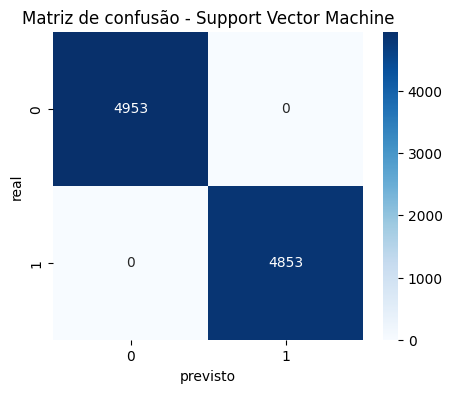

In [25]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("previsto")
plt.ylabel("real")
plt.title("Matriz de confusão - Support Vector Machine")
plt.show()

#  Previsão de potência de turbinas eólica

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
df = pd.read_csv('/content/T1.csv')
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [28]:
X = df.drop(columns=["LV ActivePower (kW)", "Date/Time"])
Y = df["LV ActivePower (kW)"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)
y_pred1 = model1.predict(X_test_scaled)

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
r2 = r2_score(y_test, y_pred1)
print("Regresão Linear")
print(f"RMSE: {rmse} R²: {r2}")

Regresão Linear
RMSE: 411.7100216966853 R²: 0.9006599245385882


In [33]:
model2  = DecisionTreeRegressor(random_state=42)
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(X_test_scaled)

In [34]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
r2 = r2_score(y_test, y_pred2)
print("Regressão de Árvores")
print(f"RMSE: {rmse} R²: {r2}")

Regressão de Árvores
RMSE: 538.7903745745243 R²: 0.8298698576314649


In [35]:
model3 = RandomForestRegressor(random_state=42)
model3.fit(X_train_scaled, y_train)
y_pred3 = model3.predict(X_test_scaled)

In [36]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))
r2 = r2_score(y_test, y_pred3)
print("Random Forest Regressor")
print(f"RMSE: {rmse} R²: {r2}")

Random Forest Regressor
RMSE: 412.8221448557191 R²: 0.9001225190519474
